# Vertical access combined optimization

In [1]:
from simsopt._core import load
from simsopt.geo import SurfaceRZFourier
from simsopt.geo import VerticalPortDiscrete

import matplotlib.pyplot as plt 
import numpy as np
import jax.numpy as jnp

%matplotlib widget

In [2]:
# Load the surface, assumed fixed in this notebook. 
surf = SurfaceRZFourier.from_vmec_input( 'input.scaled' )

nfp = surf.nfp
qpts_phi = np.linspace(0, 1/(2*nfp), 8)
qpts_theta = np.linspace(0, 1, 32)

vessel = SurfaceRZFourier(
    nfp = surf.nfp,
    mpol = surf.mpol,
    ntor = surf.ntor,
    stellsym = surf.stellsym,
    quadpoints_phi=qpts_phi,
    quadpoints_theta=qpts_theta,
    dofs = surf.dofs
)
vessel.fix_all()
vessel.unfix('rc(0,0)')
vessel.unfix('zs(1,1)')

bs = load( 'coils.wiedman.json' )
ncoils = 5
curves = [c.curve for c in bs.coils[0:2*ncoils] + bs.coils[-ncoils:]]
#curves = [c.curve for c in bs.coils[-ncoils:]]

In [3]:
from simsopt.geo import CurveCWSFourier, Curve2D

In [4]:
order = 2
qpts = np.linspace(0,1,128)
curve2d = Curve2D(
    qpts,
    order
)

curve2d.set('phic(0)', 0.0625)
curve2d.set('phic(1)', 0.025)
curve2d.set('thetac(0)', 0.3)
curve2d.set('thetas(1)', 0.25)

In [5]:
curve2d.gamma()

array([[0.0875    , 0.3       , 0.        ],
       [0.08746941, 0.31236343, 0.        ],
       [0.08737772, 0.3246966 , 0.        ],
       [0.08722514, 0.33696934, 0.        ],
       [0.08701206, 0.34915161, 0.        ],
       [0.086739  , 0.3612136 , 0.        ],
       [0.08640661, 0.37312578, 0.        ],
       [0.08601573, 0.38485902, 0.        ],
       [0.0855673 , 0.39638459, 0.        ],
       [0.08506241, 0.40767429, 0.        ],
       [0.08450232, 0.41870049, 0.        ],
       [0.08388838, 0.42943621, 0.        ],
       [0.0832221 , 0.43985519, 0.        ],
       [0.0825051 , 0.44993191, 0.        ],
       [0.08173916, 0.45964172, 0.        ],
       [0.08092613, 0.46896087, 0.        ],
       [0.08006801, 0.47786654, 0.        ],
       [0.0791669 , 0.48633694, 0.        ],
       [0.078225  , 0.49435134, 0.        ],
       [0.07724462, 0.50189013, 0.        ],
       [0.07622815, 0.50893486, 0.        ],
       [0.0751781 , 0.5154683 , 0.        ],
       [0.

In [7]:
curve2d.gammadash()

array([[ 0.00000000e+00,  1.57079633e+00,  0.00000000e+00],
       [-7.76817216e-03,  1.56887433e+00,  0.00000000e+00],
       [-1.55173343e-02,  1.56311303e+00,  0.00000000e+00],
       [-2.32285229e-02,  1.55352653e+00,  0.00000000e+00],
       [-3.08828675e-02,  1.54013829e+00,  0.00000000e+00],
       [-3.84616364e-02,  1.52298107e+00,  0.00000000e+00],
       [-4.59462834e-02,  1.50209687e+00,  0.00000000e+00],
       [-5.33184920e-02,  1.47753678e+00,  0.00000000e+00],
       [-6.05602214e-02,  1.44936091e+00,  0.00000000e+00],
       [-6.76537498e-02,  1.41763822e+00,  0.00000000e+00],
       [-7.45817181e-02,  1.38244632e+00,  0.00000000e+00],
       [-8.13271724e-02,  1.34387135e+00,  0.00000000e+00],
       [-8.78736055e-02,  1.30200770e+00,  0.00000000e+00],
       [-9.42049972e-02,  1.25695782e+00,  0.00000000e+00],
       [-1.00305853e-01,  1.20883195e+00,  0.00000000e+00],
       [-1.06161245e-01,  1.15774786e+00,  0.00000000e+00],
       [-1.11756841e-01,  1.10383058e+00

In [8]:
cws = CurveCWSFourier( curve2d, vessel )

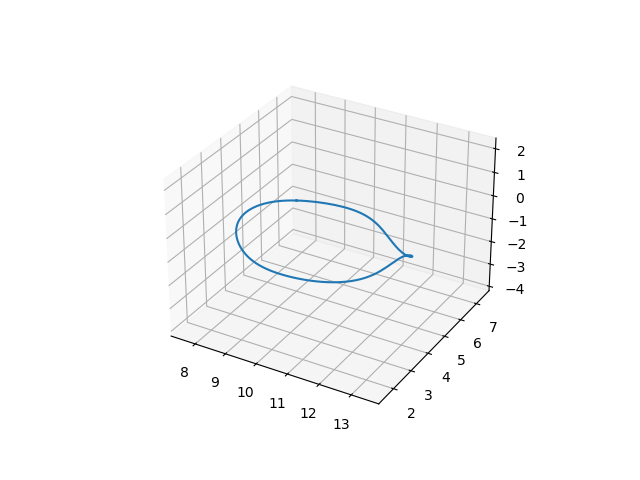

<Axes3D: >

In [9]:
cws.plot()

In [10]:
cws.curve.dgamma_by_dpoint(cws.curve.get_dofs(), cws.curve.quadpoints).shape

(384, 128)

In [12]:
cws.gamma().shape

(128, 3)

In [11]:
cws.gammadash().shape

(3, 384, 384)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (128,) and arg 3 with shape (3, 384).

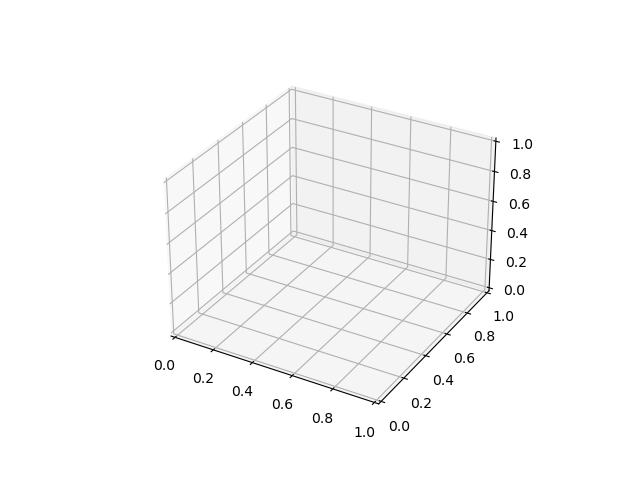

In [11]:
g = cws.gamma()
gd = cws.gammadash()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.quiver(g[:,0],g[:,1],g[:,2],gd[:,0],gd[:,1],gd[:,2],length=.1)

In [ ]:
from simsopt.geo import EnclosedXYArea, CurveCurveXYdistance, CurveXYConvexity, ToroidalAngleConstraint, UpwardFacingPort

In [ ]:
Jxyarea = EnclosedXYArea( cws )
Jxyarea.J()